<a href="https://colab.research.google.com/github/Zzang-yeah/programmers_kdt_II/blob/week4/Week5_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 4 - Django로 동적 웹 페이지 만들기
##필수 과제 : 재고 관리 List 구현하기
다음 요청을 처리하는 웹 어플리케이션을 제작해주세요.     
GET / : Day 3에서 만든 자기소개 웹 페이지를 Response
django를 바탕으로 재고 관리를 진행하는 Website를 만들고자 합니다.     
재고관리를 하고자 하는 대상을 하나 정해주세요. (coffee, burger, )
이 대상에 맞는 Database Scheme를 model로 하여 model.py 에 작성합니다.    
아래 예시에서는 coffee 재고 관리 리스템이라는 가정하에 서술합니다.    
이를 바탕으로 다음 기능을 구현해주세요.        
* GET /coffees : 커피 목록을 unordered list로 보여주기
##보너스 과제 : form을 이용해서 CUD구현하기
HTML의 form 을 이용해서 우리는 정보를 클라이언트단에서 서버단으로 전달할 수 있는데요, 이 정보를 바탕으로 다음 기능을 admin page가 아닌, /coffees 페이지에서 진행할 수 있도록 만들어봅시다.    

다음 기능을 구현해주세요. 필수 과제 부분을 완성한 후에 구현하셔야합니다.     

* POST /coffees : 새로운 커피를 추가
* PUT /coffees/<pk> : 해당하는 커피의 정보를 변경
* DELETE /coffees/<pk> : Primary Key값에 해당하는 커피를 제거
* POST, PUT, DELETE를 진행하고 난 후에는 커피 목록을 unordered list로 보여주기
redirect() 함수가 필요할 수 있습니다. 이는 인자에 해당하는 URL로 이동합니다. (그에 해당하는 views가 실행될 수도 있습니다.)

In [ ]:
#i_am_ground.html
<!DOCTYPE html>
<html>
    <head>
        <title>Burger List</title>
    </head>

    <body>
        <h1>Burger List</h1>
        {% for burger in burger_list%}
        <li><ul>{{burger.name}},{{burger.price}}</ul></li><br>
        {%endfor%}
        <form method="POST"> {% csrf_token %}
            {{burger_form.as_p}}
            <button type="submit">Save</button>
        </form>
    </body>
</html>

#forms.py
class BurgerForm(forms.ModelForm):  #ModelForm을 상속받는 CoffeeForm생성
    class Meta:
        model = Burger
        fields=('name','price','is_set')

#models.py
# Create your models here.
class Burger(models.Model):
    def __str__(self):
        return self.name
    name=models.CharField(default='',null=False, max_length=30)
    price=models.IntegerField(default=0)
    is_set=models.BooleanField(default=False)

#views.py
def burger_view(request):
    burger_all=Burger.objects.all()
    #만약 request가 POST라면:
    if request.method=="POST":
        #POST를 바탕으로 FORM을 완성하고
        form=BurgerForm(request.POST)   #완성된 Form
        #채워진 FORM이 유효하면
        if form.is_valid():
            #Form내용을 Model에 저장
            form.save()
    form=BurgerForm()
    return render(request, 'i_am_ground.html',{"burger_list":burger_all, "burger_form":form})

#urls.py
from django.contrib import admin
from django.urls import path
from homepage.views import index, coffee_view, i_am_ground, burger_view

urlpatterns = [
    path('', index),   #http://127.0.0.1:8000/
    path('GET', i_am_ground),   #http://127.0.0.1:8000/GET/
    path('GET/burger', burger_view),   #http://127.0.0.1:8000/GET/
    path('coffee/', coffee_view),   #http://127.0.0.1:8000/coffee/
    path('admin/', admin.site.urls),    #http://127.0.0.1:8000/admin
]

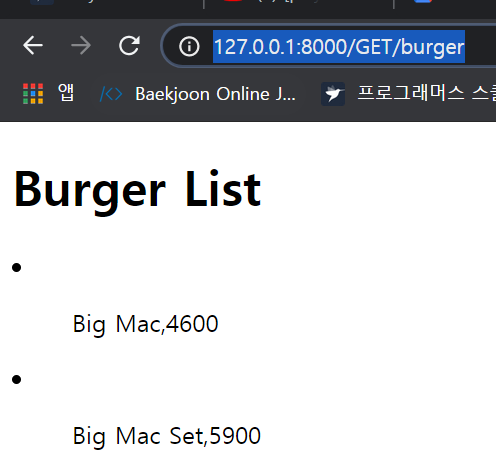